In [1]:
from typing import Callable, List


def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """
    Calculate the difference quotient of a function at a given point.
    This function calculates the difference quotient of a function `f` at a given
    point `x`. The difference quotient is an approximation of the derivative of
    the function at that point.
    Parameters:
    -----------
    f : Callable[[float], float]
        The function for which to calculate the difference quotient.
    x : float
        The point at which to calculate the difference quotient.
    h : float
        The small value by which to perturb `x`.
    Returns:
    --------
    float:
        The difference quotient of the function at the given point.
    """
    return (f(x + h) - f(x)) / h

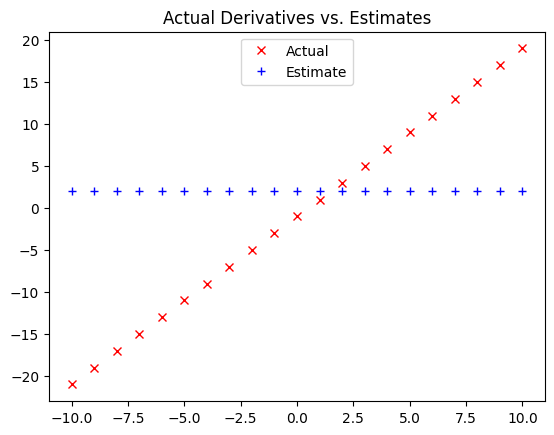

In [2]:
import matplotlib.pyplot as plt
xs = range(-10, 11)
actuals = [2 * x - 1 for x in xs]
estimateds = [difference_quotient(lambda x: 2 * x - 1, x, h=0.001) for x in xs]

# plot to show they're basically the same
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimateds, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [3]:
def partial_difference_quotient(f: Callable[[float], float], v: List[float], i: int, h: float) -> float:
    """
    Calculate the partial difference quotient of a function at a given point.
    This function calculates the partial difference quotient of a function `f` at a given
    point `v`. The partial difference quotient is an approximation of the partial derivative
    of the function at that point with respect to the `i`-th variable.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the partial difference quotient.
    v : List[float]
        The point at which to calculate the partial difference quotient.
    i : int
        The index of the variable with respect to which to calculate the partial derivative.
    h : float
        The small value by which to perturb the `i`-th variable.
    Returns:
    --------
    float:
        The partial difference quotient of the function at the given point.
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [4]:
def estimate_gradient(f: Callable[[List[float]], float], v: List[float], h: float = 0.00001) -> List[float]:
    """
    Estimate the gradient of a function at a given point.
    This function estimates the gradient of a function `f` at a given point `v`. The gradient
    is a vector of partial derivatives of the function at that point.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the gradient.
    v : List[float]
        The point at which to calculate the gradient.
    h : float
        The small value by which to perturb the variables.
    Returns:
    --------
    List[float]:
        The gradient of the function at the given point.
    """
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [5]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply


def gradient_step(v: List[float], gradient: List[float], step_size: float) -> List[float]:
    """
    Take a step in the direction of the gradient.
    This function takes a step in the direction of the gradient of a function `f` at a given
    point `v`. The step size is determined by the `step_size` parameter.
    Parameters:
    -----------
    v : List[float]
        The point at which to take a step.
    gradient : List[float]
        The gradient of the function at the given point.
    step_size : float
        The size of the step to take.
    Returns:
    --------
    List[float]:
        The new point after taking a step in the direction of the gradient.
    """
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def sum_of_squares_gradient(v: List[float]) -> List[float]:
    """
    Calculate the gradient of the sum of squares function.
    This function calculates the gradient of the sum of squares function at a given point `v`.
    The sum of squares function is a simple quadratic function that has a minimum at the origin.
    Parameters:
    -----------
    v : List[float]
        The point at which to calculate the gradient.
    Returns:
    --------
    List[float]:
        The gradient of the sum of squares function at the given point.
    """
    return [2 * v_i for v_i in v]


# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # compute the gradient at v
    v = gradient_step(v, grad, -0.01)  # take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

0 [8.319260451312575, 7.756198859779955, -6.46859219532694]
1 [8.152875242286322, 7.601074882584356, -6.3392203514204]
2 [7.989817737440596, 7.449053384932669, -6.212435944391992]
3 [7.830021382691784, 7.300072317234015, -6.088187225504153]
4 [7.673420955037948, 7.154070870889335, -5.966423480994069]
5 [7.51995253593719, 7.010989453471548, -5.847095011374188]
6 [7.369553485218446, 6.870769664402117, -5.730153111146705]
7 [7.2221624155140765, 6.733354271114075, -5.615550048923771]
8 [7.077719167203795, 6.5986871856917935, -5.5032390479452955]
9 [6.936164783859719, 6.466713441977958, -5.39317426698639]
10 [6.797441488182525, 6.337379173138398, -5.285310781646662]
11 [6.661492658418874, 6.21063158967563, -5.179604566013729]
12 [6.528262805250496, 6.086418957882118, -5.076012474693454]
13 [6.397697549145486, 5.9646905787244755, -4.974492225199585]
14 [6.269743598162576, 5.845396767149986, -4.8750023806955936]
15 [6.144348726199325, 5.728488831806986, -4.7775023330816815]
16 [6.021461751675